In [538]:
import pandas as pd
import numpy as np
import os
os.environ["LOKY_MAX_CPU_COUNT"] = "4"

In [539]:
df = pd.read_excel("Employee.xlsx")
df.head()

c:\Users\Lenovo\AppData\Local\Programs\Python\Python38\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,Employe ID,Gender,Age,Education,Department,Performance Rating,Absent,Turnover,ESI 1,ESI 2,ESI 3,Promoted This Year,Complete the Training Course,Training Evaluation Score,Min. Training Pass Eval. Score
0,BCGX7377,Male,27,Master’s degree,Business Development,7.92,1,No,9,8,6,No,Yes,98,70
1,BCGX4795,Male,44,Higher education (Bachelor’s degree),Engineering,5.94,7,No,8,10,9,No,No,91,70
2,BCGX4007,Female,21,Higher education (Bachelor’s degree),Human Resources,9.90,0,No,8,10,10,Yes,No,62,70
3,BCGX9524,Male,47,Higher education (Bachelor’s degree),Business Development,9.90,5,No,7,9,8,Yes,No,77,70
4,BCGX8426,Female,46,Doctor of Philosophy (Ph.D.),Product Management,7.92,4,No,9,9,9,No,Yes,85,70


In [540]:
df.isna().sum()

Employe ID                        0
Gender                            0
Age                               0
Education                         0
Department                        0
Performance Rating                0
Absent                            0
Turnover                          0
ESI 1                             0
ESI 2                             0
ESI 3                             0
Promoted This Year                0
Complete the Training Course      0
Training Evaluation Score         0
Min. Training Pass Eval. Score    0
dtype: int64

In [541]:
df.duplicated().sum()

0

In [542]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 854 entries, 0 to 853
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Employe ID                      854 non-null    object 
 1   Gender                          854 non-null    object 
 2   Age                             854 non-null    int64  
 3   Education                       854 non-null    object 
 4   Department                      854 non-null    object 
 5   Performance Rating              854 non-null    float64
 6   Absent                          854 non-null    int64  
 7   Turnover                        854 non-null    object 
 8   ESI 1                           854 non-null    int64  
 9   ESI 2                           854 non-null    int64  
 10  ESI 3                           854 non-null    int64  
 11  Promoted This Year              854 non-null    object 
 12  Complete the Training Course    854 

In [543]:
df['Education'].value_counts()

Education
Master’s degree                         280
Higher education (Bachelor’s degree)    275
Doctor of Philosophy (Ph.D.)            108
Primary education                       104
Secondary education                      87
Name: count, dtype: int64

In [544]:
df['Department'].value_counts()

Department
Business Development    93
Legal                   88
Creative                84
Sales                   73
Data                    72
Product Management      70
Quality Assurance       68
Human Resources         67
Engineering             64
Operations              64
Finance                 57
Marketing               54
Name: count, dtype: int64

In [545]:
df['Absent'].value_counts()

Absent
5    166
6    162
4    135
1     90
3     88
2     79
0     77
7     57
Name: count, dtype: int64

In [546]:
df['Turnover'].value_counts()

Turnover
No     734
Yes    119
v        1
Name: count, dtype: int64

In [547]:
df.shape

(854, 15)

In [548]:
df = df[df['Turnover'] != 'v']

In [549]:
df['Turnover'].value_counts()

Turnover
No     734
Yes    119
Name: count, dtype: int64

In [550]:
df.shape

(853, 15)

In [551]:
df['Promoted This Year'] = df['Promoted This Year'].map({'No': 0, 'Yes': 1})

In [552]:
df['Complete the Training Course'] = df['Complete the Training Course'].map({'No': 0, 'Yes': 1})

In [553]:
df.to_excel('clean_Employee2.xlsx', index=False)

In [554]:
df['Complete the Training Course'].sum()

498

In [555]:
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})



In [556]:
# Menggunakan one-hot encoding
df_encoded = pd.get_dummies(df['Department'], prefix='Department')

# Menyisipkan kolom yang sudah di-encode ke dalam DataFrame utama
df = pd.concat([df, df_encoded], axis=1)

In [557]:
# Menampilkan semua nama kolom dari DataFrame
print(df.columns)

Index(['Employe ID', 'Gender', 'Age', 'Education', 'Department',
       'Performance Rating', 'Absent', 'Turnover', 'ESI 1', 'ESI 2', 'ESI 3',
       'Promoted This Year', 'Complete the Training Course',
       'Training Evaluation Score', 'Min. Training Pass Eval. Score',
       'Department_Business Development', 'Department_Creative',
       'Department_Data', 'Department_Engineering', 'Department_Finance',
       'Department_Human Resources', 'Department_Legal',
       'Department_Marketing', 'Department_Operations',
       'Department_Product Management', 'Department_Quality Assurance',
       'Department_Sales'],
      dtype='object')


In [558]:
print(df['Education'].unique())

['Master’s degree' 'Higher education (Bachelor’s degree)'
 'Doctor of Philosophy (Ph.D.)' 'Secondary education' 'Primary education']


In [559]:
print(df['Education'].dtype)

object


In [560]:
df['Education'] = df['Education'].str.strip()
# Definisikan urutan kategori
education_order = {
    'Primary education': 1,
    'Secondary education': 2,
    'Higher education (Bachelor’s degree)': 3,
    'Master’s degree': 4,
    'Doctor of Philosophy (Ph.D.)': 5
}

# Ganti kategori dengan nilai ordinal
df['Education_Ordinal'] = df['Education'].map(education_order)


In [561]:
unmapped_values = df[df['Education_Ordinal'].isna()]['Education'].unique()
print("Unmapped values:", unmapped_values)


Unmapped values: []


In [562]:
print(df[['Education', 'Education_Ordinal']].head())


                              Education  Education_Ordinal
0                       Master’s degree                  4
1  Higher education (Bachelor’s degree)                  3
2  Higher education (Bachelor’s degree)                  3
3  Higher education (Bachelor’s degree)                  3
4          Doctor of Philosophy (Ph.D.)                  5


In [563]:
df['Employee Satisfaction'] = (((df['ESI 1']+df['ESI 2']+df['ESI 3']/3)-1)/9)*100

In [564]:
print(df.columns)

Index(['Employe ID', 'Gender', 'Age', 'Education', 'Department',
       'Performance Rating', 'Absent', 'Turnover', 'ESI 1', 'ESI 2', 'ESI 3',
       'Promoted This Year', 'Complete the Training Course',
       'Training Evaluation Score', 'Min. Training Pass Eval. Score',
       'Department_Business Development', 'Department_Creative',
       'Department_Data', 'Department_Engineering', 'Department_Finance',
       'Department_Human Resources', 'Department_Legal',
       'Department_Marketing', 'Department_Operations',
       'Department_Product Management', 'Department_Quality Assurance',
       'Department_Sales', 'Education_Ordinal', 'Employee Satisfaction'],
      dtype='object')


In [565]:
# Menghapus kolom Employee ID, Department, dan Turnover dari DataFrame
df.drop(columns=['Employe ID', 'Education', 'Department', 'ESI 1', 'ESI 2', 'ESI 3'], inplace=True)

In [566]:
print(df.columns)

Index(['Gender', 'Age', 'Performance Rating', 'Absent', 'Turnover',
       'Promoted This Year', 'Complete the Training Course',
       'Training Evaluation Score', 'Min. Training Pass Eval. Score',
       'Department_Business Development', 'Department_Creative',
       'Department_Data', 'Department_Engineering', 'Department_Finance',
       'Department_Human Resources', 'Department_Legal',
       'Department_Marketing', 'Department_Operations',
       'Department_Product Management', 'Department_Quality Assurance',
       'Department_Sales', 'Education_Ordinal', 'Employee Satisfaction'],
      dtype='object')


In [567]:
df.head()

,Gender,Age,Performance Rating,Absent,Turnover,Promoted This Year,Complete the Training Course,Training Evaluation Score,Min. Training Pass Eval. Score,Department_Business Development,...,Department_Finance,Department_Human Resources,Department_Legal,Department_Marketing,Department_Operations,Department_Product Management,Department_Quality Assurance,Department_Sales,Education_Ordinal,Employee Satisfaction
0,1,27,7.92,1,No,0,1,98,70,True,...,False,False,False,False,False,False,False,False,4,200.000000
1,1,44,5.94,7,No,0,0,91,70,False,...,False,False,False,False,False,False,False,False,3,222.222222
2,0,21,9.90,0,No,1,0,62,70,False,...,False,True,False,False,False,False,False,False,3,225.925926
3,1,47,9.90,5,No,1,0,77,70,True,...,False,False,False,False,False,False,False,False,3,196.296296
4,0,46,7.92,4,No,0,1,85,70,False,...,False,False,False,False,False,True,False,False,5,222.222222


In [568]:
df. shape

(853, 23)

In [569]:
print(df.isna().sum())

Gender                             0
Age                                0
Performance Rating                 0
Absent                             0
Turnover                           0
Promoted This Year                 0
Complete the Training Course       0
Training Evaluation Score          0
Min. Training Pass Eval. Score     0
Department_Business Development    0
Department_Creative                0
Department_Data                    0
Department_Engineering             0
Department_Finance                 0
Department_Human Resources         0
Department_Legal                   0
Department_Marketing               0
Department_Operations              0
Department_Product Management      0
Department_Quality Assurance       0
Department_Sales                   0
Education_Ordinal                  0
Employee Satisfaction              0
dtype: int64


In [570]:
df['Turnover'] = df['Turnover'].str.strip()

In [571]:
df['Turnover'] = df['Turnover'].map({'No': 0, 'Yes': 1})

In [572]:
df['Turnover'].head()

0    0
1    0
2    0
3    0
4    0
Name: Turnover, dtype: int64

In [573]:
print(df.isna().sum())

Gender                             0
Age                                0
Performance Rating                 0
Absent                             0
Turnover                           0
Promoted This Year                 0
Complete the Training Course       0
Training Evaluation Score          0
Min. Training Pass Eval. Score     0
Department_Business Development    0
Department_Creative                0
Department_Data                    0
Department_Engineering             0
Department_Finance                 0
Department_Human Resources         0
Department_Legal                   0
Department_Marketing               0
Department_Operations              0
Department_Product Management      0
Department_Quality Assurance       0
Department_Sales                   0
Education_Ordinal                  0
Employee Satisfaction              0
dtype: int64


In [575]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Memisahkan fitur dan label
X = df.drop(columns=['Turnover'])
y = df['Turnover']

# Membagi data menjadi set pelatihan dan set pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [576]:
print(y_test.value_counts())

Turnover
0    220
1     36
Name: count, dtype: int64


In [577]:
print(y_train.value_counts())

Turnover
0    514
1     83
Name: count, dtype: int64


In [ ]:
# Menstandarisasi fitur menggunakan Min-Max Scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit dan transform pada data pelatihan
X_test_scaled = scaler.transform(X_test)        # Transform data pengujian dengan scaler yang sama

# Inisialisasi beberapa model
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Support Vector Machine': SVC(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier()
}
# DataFrame untuk menyimpan hasil evaluasi
results = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision (No)', 'Recall (No)', 'F1 (No)', 
                                'Precision (Yes)', 'Recall (Yes)', 'F1 (Yes)'])

# Melatih model dan menampilkan hasil evaluasi
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Menyimpan hasil ke dalam DataFrame
    results = results._append({
        'Model': name,
        'Accuracy': report['accuracy'],
        'Precision (No)': report['0']['precision'],
        'Recall (No)': report['0']['recall'],
        'F1 (No)': report['0']['f1-score'],
        'Precision (Yes)': report['1']['precision'],
        'Recall (Yes)': report['1']['recall'],
        'F1 (Yes)': report['1']['f1-score']
    }, ignore_index=True)


c:\Users\Lenovo\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Lenovo\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Lenovo\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

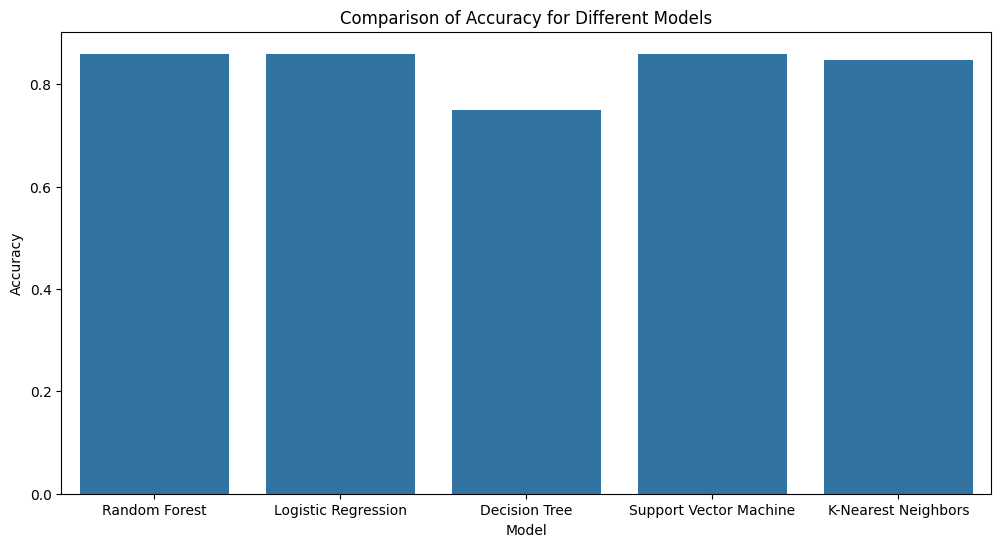

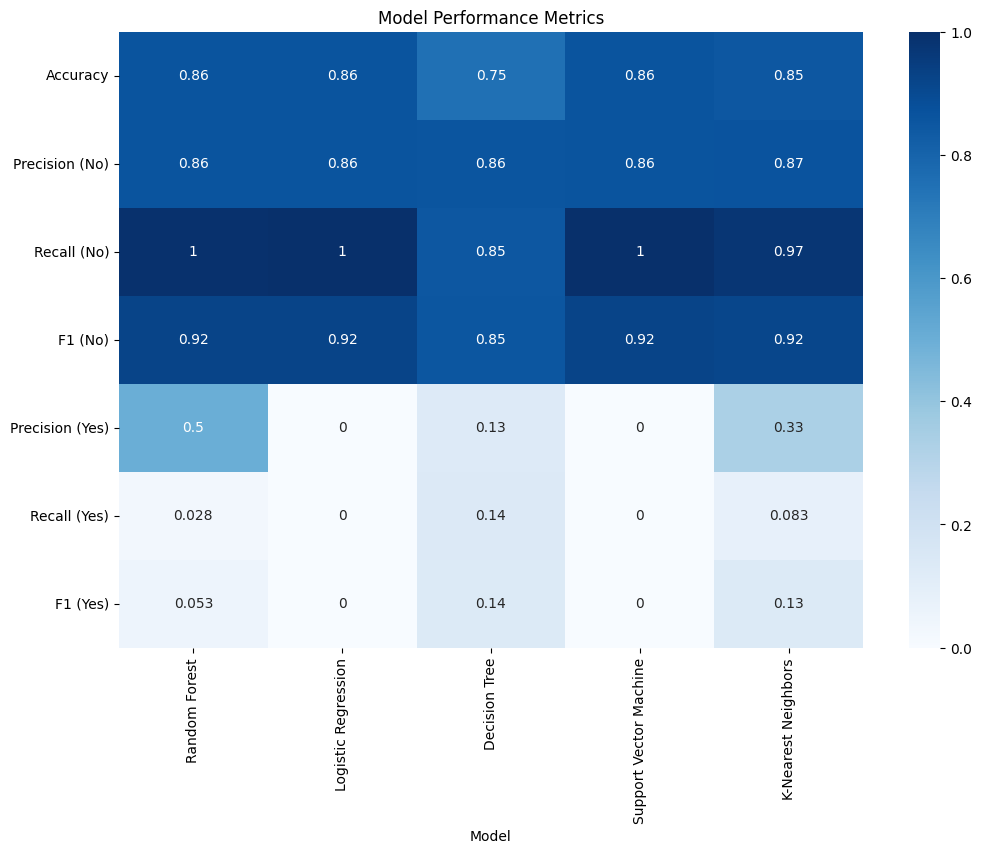

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot bar chart untuk Accuracy
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Accuracy', data=results)
plt.title('Comparison of Accuracy for Different Models')
plt.show()

# Plot heatmap untuk Precision, Recall, F1
plt.figure(figsize=(12, 8))
sns.heatmap(results.set_index('Model').T, annot=True, cmap='Blues')
plt.title('Model Performance Metrics')
plt.show()


In [ ]:
results

,Model,Accuracy,Precision (No),Recall (No),F1 (No),Precision (Yes),Recall (Yes),F1 (Yes)
0,Random Forest,0.863281,0.869565,0.990991,0.926316,0.333333,0.029412,0.054054
1,Logistic Regression,0.867188,0.867188,1.000000,0.928870,0.000000,0.000000,0.000000
2,Decision Tree,0.789062,0.892523,0.860360,0.876147,0.261905,0.323529,0.289474
3,Support Vector Machine,0.867188,0.867188,1.000000,0.928870,0.000000,0.000000,0.000000
4,K-Nearest Neighbors,0.851562,0.883333,0.954955,0.917749,0.375000,0.176471,0.240000
